In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [4]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [5]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [6]:
df.duplicated().sum()

0

<h1>Data Analysis and Visualization</h1>


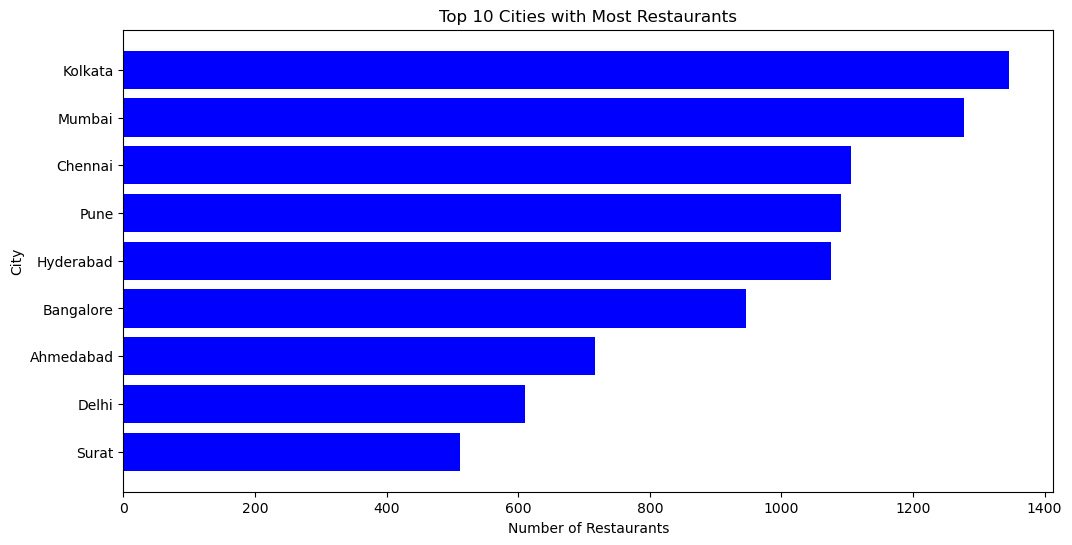

In [7]:
# Which city has the highest no of restaurants
city_restaurant_counts = df.groupby('City')['Restaurant'].count().reset_index(name='Restaurant Count')
top_cities = city_restaurant_counts.sort_values(by='Restaurant Count', ascending=False).head(10)

# Plot the top 10 cities
plt.figure(figsize=(12, 6))
plt.barh(top_cities['City'], top_cities['Restaurant Count'], color='Blue')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Top 10 Cities with Most Restaurants')
plt.gca().invert_yaxis()
plt.show()


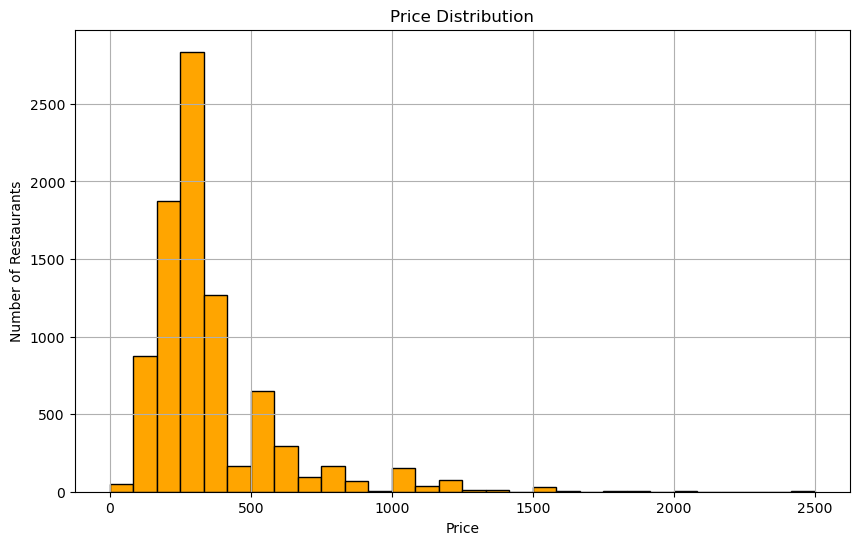

In [8]:
# Plot the distribution of prices
plt.figure(figsize=(10, 6))
df['Price'].hist(bins=30, color='orange', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Number of Restaurants')
plt.title('Price Distribution')
plt.show()


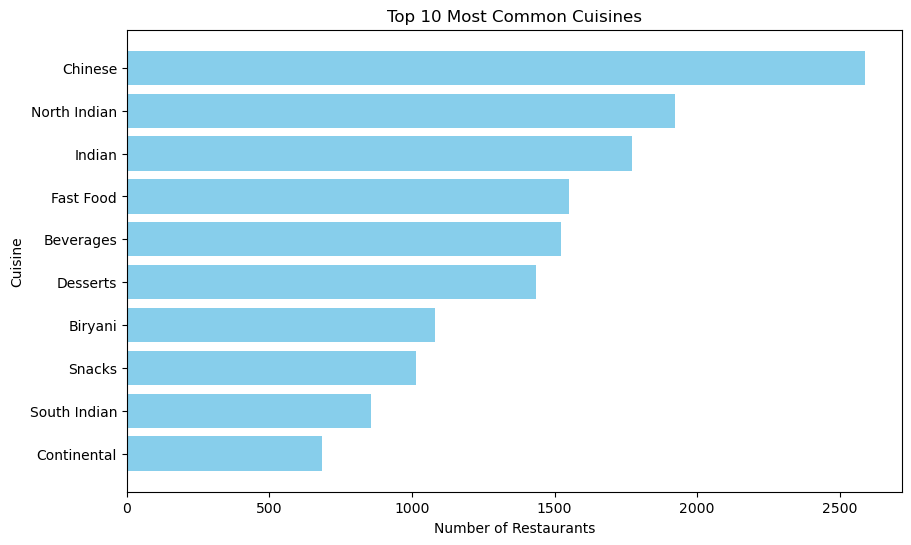

In [12]:
from collections import Counter

# Split 'Food type' into individual cuisines and count the frequency
all_cuisines = df['Food type'].str.split(',').sum()
cuisine_counts = Counter(all_cuisines)

# Convert to a DataFrame
cuisine_counts_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

# Get the top 10 cuisines
top_cuisines = cuisine_counts_df.head(10)

# Plot the top 10 cuisines
plt.figure(figsize=(10, 6))
plt.barh(top_cuisines['Cuisine'], top_cuisines['Count'], color='skyblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Common Cuisines')
plt.gca().invert_yaxis()
plt.show()


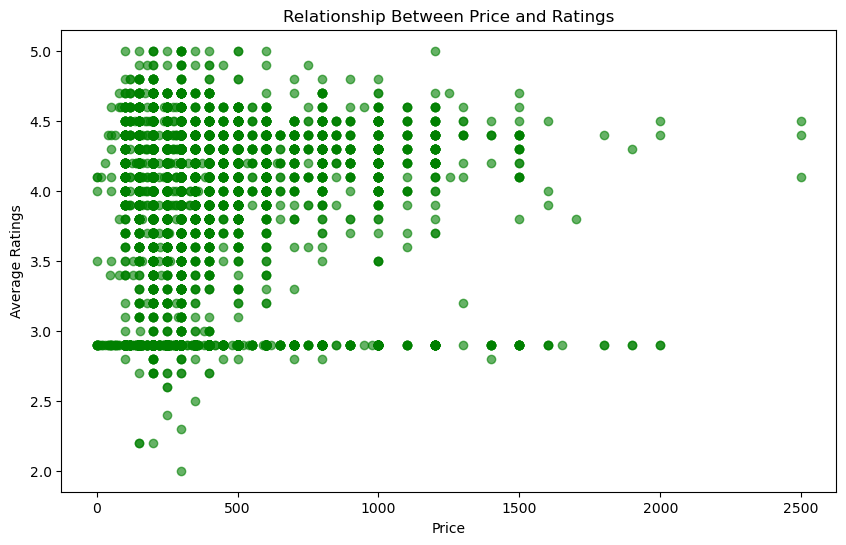

In [13]:
# Scatter plot of Price vs. Avg ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Avg ratings'], alpha=0.6, color='green')
plt.xlabel('Price')
plt.ylabel('Average Ratings')
plt.title('Relationship Between Price and Ratings')
plt.show()


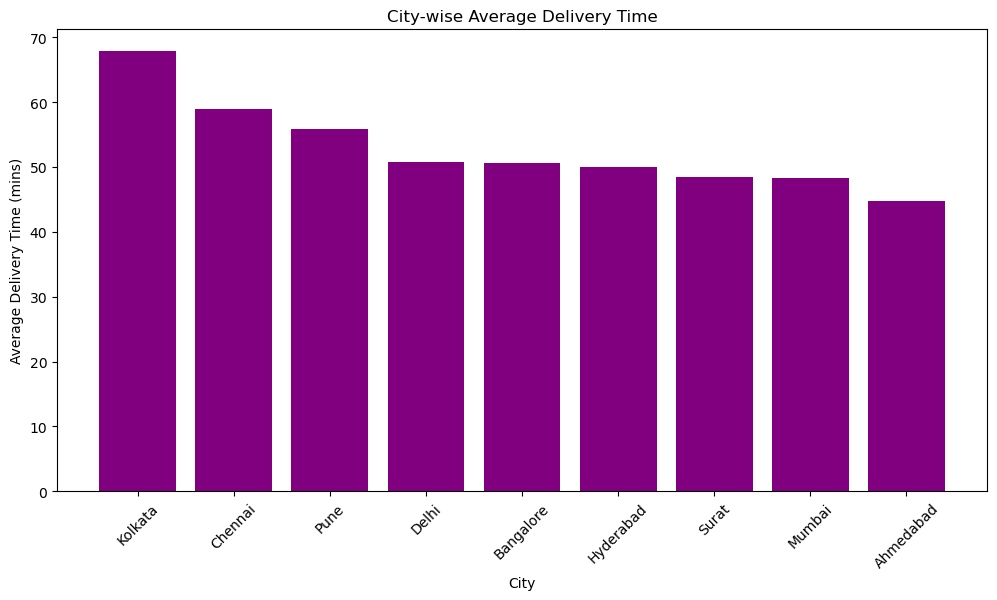

In [14]:
# Calculate average delivery time per city
avg_delivery_time = df.groupby('City')['Delivery time'].mean().reset_index()

# Sort values for visualization
avg_delivery_time = avg_delivery_time.sort_values(by='Delivery time', ascending=False)

# Plot  
plt.figure(figsize=(12, 6))
plt.bar(avg_delivery_time['City'], avg_delivery_time['Delivery time'], color='purple')
plt.xlabel('City')
plt.ylabel('Average Delivery Time (mins)')
plt.title('City-wise Average Delivery Time')
plt.xticks(rotation=45)
plt.show()


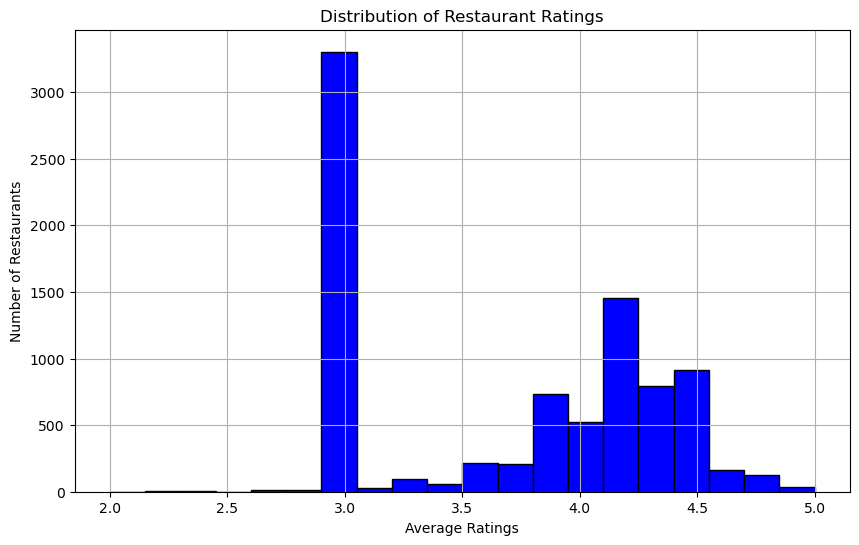

In [15]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
df['Avg ratings'].hist(bins=20, color='blue', edgecolor='black')
plt.xlabel('Average Ratings')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()
